# Preprocessing
## Read the database

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# numpy arrays are used to .
import numpy as np

# pandas is used to manipulate tabular data.
import pandas as pd

# statsmodels provides classes and functions for the estimation of many different statistical models.
import statsmodels.api as sm

# itertools implements a number of iterator building blocks for efficient looping.
import itertools

# time provides various time-related functions
import time

# Matplotlib is used to plot graphs
%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# Style options for plots.
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Saves a figure to a file
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join("./figs", fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## For PCA part
#################
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression, PLSSVD
from sklearn.metrics import mean_squared_error

# Some libraries for PCA visualization
import seaborn as sns 
#Make Plotly figure
!pip install chart_studio
import chart_studio.plotly as py
# Be aware, plotly may be installed using pip on your shell:
# conda install -c plotly chart-studio
import plotly.graph_objs as go


Defaulting to user installation because normal site-packages is not writeable


In [2]:
# Define the column names based on your description
column_names = [
    "Carbon concentration (weight%)", "Silicon concentration (weight%)", 
    "Manganese concentration (weight%)", "Sulphur concentration (weight%)", 
    "Phosphorus concentration (weight%)", "Nickel concentration (weight%)", 
    "Chromium concentration (weight%)", "Molybdenum concentration (weight%)", 
    "Vanadium concentration (weight%)", "Copper concentration (weight%)", 
    "Cobalt concentration (weight%)", "Tungsten concentration (weight%)", 
    "Oxygen concentration (ppm)", "Titanium concentration (ppm)", 
    "Nitrogen concentration (ppm)", "Aluminium concentration (ppm)", 
    "Boron concentration (ppm)", "Niobium concentration (ppm)", 
    "Tin concentration (ppm)", "Arsenic concentration (ppm)", 
    "Antimony concentration (ppm)", "Current (A)", "Voltage (V)", 
    "AC or DC", "Electrode positive or negative", "Heat input (kJmm-1)", 
    "Interpass temperature (°C)", "Type of weld", "Post weld heat treatment temperature (°C)", 
    "Post weld heat treatment time (hours)", "Yield strength (MPa)", 
    "Ultimate tensile strength (MPa)", "Elongation (%)", 
    "Reduction of Area (%)", "Charpy temperature (°C)", 
    "Charpy impact toughness (J)", "Hardness (kgmm-2)", "50 % FATT", 
    "Primary ferrite in microstructure (%)", "Ferrite with second phase (%)", 
    "Acicular ferrite (%)", "Martensite (%)", "Ferrite with carbide aggregate (%)", 
    "Weld ID"
]

file_path = 'welddb/welddb.data'
welddb = pd.read_csv(file_path, delim_whitespace=True, header=None, names=column_names)

print(welddb.shape)


(1652, 44)


C:\Users\12264\AppData\Local\Temp\ipykernel_22372\1804127193.py:26: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  welddb = pd.read_csv(file_path, delim_whitespace=True, header=None, names=column_names)


In [3]:
welddb.head()

,Carbon concentration (weight%),Silicon concentration (weight%),Manganese concentration (weight%),Sulphur concentration (weight%),Phosphorus concentration (weight%),Nickel concentration (weight%),Chromium concentration (weight%),Molybdenum concentration (weight%),Vanadium concentration (weight%),Copper concentration (weight%),...,Charpy temperature (°C),Charpy impact toughness (J),Hardness (kgmm-2),50 % FATT,Primary ferrite in microstructure (%),Ferrite with second phase (%),Acicular ferrite (%),Martensite (%),Ferrite with carbide aggregate (%),Weld ID
0,0.037,0.30,0.65,0.008,0.012,0,N,N,N,N,...,N,N,N,N,N,N,N,N,N,Evans-Ni/CMn-1990/1991-0Aaw
1,0.037,0.30,0.65,0.008,0.012,0,N,N,N,N,...,-28,100,N,N,N,N,N,N,N,Evans-Ni/CMn-1990/1991-0Aawch
2,0.037,0.30,0.65,0.008,0.012,0,N,N,N,N,...,-38,100,N,N,N,N,N,N,N,Evans-Ni/CMn-1990/1991-0Aht
3,0.037,0.31,1.03,0.007,0.014,0,N,N,N,N,...,N,N,N,N,N,N,N,N,N,Evans-Ni/CMn-1990/1991-0Baw
4,0.037,0.31,1.03,0.007,0.014,0,N,N,N,N,...,-48,100,N,N,32,28,40,0,0,Evans-Ni/CMn-1990/1991-0Bawch


In [4]:
welddb.tail(10)

,Carbon concentration (weight%),Silicon concentration (weight%),Manganese concentration (weight%),Sulphur concentration (weight%),Phosphorus concentration (weight%),Nickel concentration (weight%),Chromium concentration (weight%),Molybdenum concentration (weight%),Vanadium concentration (weight%),Copper concentration (weight%),...,Charpy temperature (°C),Charpy impact toughness (J),Hardness (kgmm-2),50 % FATT,Primary ferrite in microstructure (%),Ferrite with second phase (%),Acicular ferrite (%),Martensite (%),Ferrite with carbide aggregate (%),Weld ID
1642,0.069,0.25,1.37,0.007,0.009,0.00,0.00,0.00,<0.0005,1.60,...,-67,28,N,N,N,N,N,N,N,EvansLetterC+1.5Cuch2
1643,0.088,0.39,0.89,0.008,0.017,0.57,8.2,0.96,0.18,N,...,N,N,N,N,N,N,N,N,N,Birmingham-MAX31
1644,0.088,0.38,0.55,0.008,0.017,0.52,8.6,0.98,0.19,N,...,N,N,N,N,N,N,N,N,N,Birmingham-MAX32
1645,0.098,0.39,1.63,0.008,0.017,0.79,8.6,0.98,0.2,N,...,N,N,N,N,N,N,N,N,N,Birmingham-MAX33
1646,0.100,0.36,0.93,0.008,0.016,0.23,8.9,1.02,0.2,N,...,N,N,N,N,N,N,N,N,N,Birmingham-MAX34
1647,0.100,0.35,0.90,0.008,0.016,0.60,8.6,0.98,0.18,N,...,N,N,N,N,N,N,N,N,N,Birmingham-MAX35
1648,0.088,0.36,0.88,0.008,0.017,0.57,8.4,0.94,0.19,N,...,N,N,N,N,N,N,N,N,N,Birmingham-MAX36
1649,0.090,0.34,0.89,0.008,0.016,0.17,8.2,0.94,0.02,N,...,N,N,N,N,N,N,N,N,N,Birmingham-MAX37
1650,0.092,0.35,0.90,0.008,0.016,0.54,8.4,0.97,0.17,N,...,N,N,N,N,N,N,N,N,N,Birmingham-MAX38
1651,0.180,0.39,0.88,0.008,0.017,0.18,10.2,0.94,0.28,N,...,N,N,N,N,N,N,N,N,N,Birmingham-MAX39


## Clean the database

1. **Handle Missing Values**: 
   - Replace occurrences of `'N'` with `NaN` (using NumPy) to mark them as missing data.

2. **Fix Object-Type Columns with '<' Symbols**:
   - Remove the `'<'` symbol (which indicates a very small concentration or percentage) so that these columns can be converted to numeric types. 

3. **Extract Numeric Values from Nitrogen concentration (ppm)**:
   - `'67tot33res'` should be simplified to `67.0`.

4. **Drop the 'Weld ID' Column**:
   - The **'Weld ID'** column contains names for welds, indicating some reference sources.


In [5]:
welddb.replace({'N': np.nan}, regex=True, inplace=True)
welddb = welddb.apply(pd.to_numeric, errors='ignore')

welddb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1652 entries, 0 to 1651
Data columns (total 44 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Carbon concentration (weight%)             1652 non-null   float64
 1   Silicon concentration (weight%)            1652 non-null   float64
 2   Manganese concentration (weight%)          1652 non-null   float64
 3   Sulphur concentration (weight%)            1648 non-null   object 
 4   Phosphorus concentration (weight%)         1642 non-null   float64
 5   Nickel concentration (weight%)             697 non-null    float64
 6   Chromium concentration (weight%)           784 non-null    float64
 7   Molybdenum concentration (weight%)         793 non-null    object 
 8   Vanadium concentration (weight%)           928 non-null    object 
 9   Copper concentration (weight%)             578 non-null    object 
 10  Cobalt concentration (we

C:\Users\12264\AppData\Local\Temp\ipykernel_22372\3809596426.py:2: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  welddb = welddb.apply(pd.to_numeric, errors='ignore')


In [6]:
# Count occurrences of symbol '<' in the object-type columns and check them

object_columns = welddb.select_dtypes(include=['object'])
symbol_counts = {'<': 0}

for column in object_columns.columns:
    # Count occurrences of '<' in each column
    less_than_count = object_columns[column].str.contains('<').sum()
    
    symbol_counts['<'] += less_than_count
    
    print(f"Column: {column} -> '<' count: {less_than_count}")

print(f"Total '<' count: {symbol_counts['<']}")

Column: Sulphur concentration (weight%) -> '<' count: 7
Column: Molybdenum concentration (weight%) -> '<' count: 2
Column: Vanadium concentration (weight%) -> '<' count: 308
Column: Copper concentration (weight%) -> '<' count: 14
Column: Cobalt concentration (weight%) -> '<' count: 21
Column: Tungsten concentration (weight%) -> '<' count: 12
Column: Titanium concentration (ppm) -> '<' count: 70
Column: Nitrogen concentration (ppm) -> '<' count: 0
Column: Aluminium concentration (ppm) -> '<' count: 403
Column: Boron concentration (ppm) -> '<' count: 419
Column: Niobium concentration (ppm) -> '<' count: 299
Column: Tin concentration (ppm) -> '<' count: 5
Column: Arsenic concentration (ppm) -> '<' count: 8
Column: Antimony concentration (ppm) -> '<' count: 6
Column: AC or DC -> '<' count: 0
Column: Electrode positive or negative -> '<' count: 0
Column: Interpass temperature (°C) -> '<' count: 0
Column: Type of weld -> '<' count: 0
Column: Hardness (kgmm-2) -> '<' count: 0
Column: Primary 

In [7]:
welddb.replace({r'<': '', }, regex=True, inplace=True)
welddb = welddb.apply(pd.to_numeric, errors='ignore')

welddb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1652 entries, 0 to 1651
Data columns (total 44 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Carbon concentration (weight%)             1652 non-null   float64
 1   Silicon concentration (weight%)            1652 non-null   float64
 2   Manganese concentration (weight%)          1652 non-null   float64
 3   Sulphur concentration (weight%)            1648 non-null   float64
 4   Phosphorus concentration (weight%)         1642 non-null   float64
 5   Nickel concentration (weight%)             697 non-null    float64
 6   Chromium concentration (weight%)           784 non-null    float64
 7   Molybdenum concentration (weight%)         793 non-null    float64
 8   Vanadium concentration (weight%)           928 non-null    float64
 9   Copper concentration (weight%)             578 non-null    float64
 10  Cobalt concentration (we

C:\Users\12264\AppData\Local\Temp\ipykernel_22372\2246164395.py:2: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  welddb = welddb.apply(pd.to_numeric, errors='ignore')


In [8]:
object_columns = welddb.select_dtypes(include=['object'])

# Apply value_counts() for each column and print the result
for column in object_columns.columns:
    print(f"Value counts for column: {column}")
    print(welddb[column].value_counts())
    print("\n")

Value counts for column: Nitrogen concentration (ppm)
Nitrogen concentration (ppm)
80     38
77     36
84     31
81     30
75     29
       ..
122     1
121     1
116     1
540     1
394     1
Name: count, Length: 161, dtype: int64


Value counts for column: AC or DC
AC or DC
DC    1395
AC      42
Name: count, dtype: int64


Value counts for column: Electrode positive or negative
Electrode positive or negative
+    1451
0      38
-       7
Name: count, dtype: int64


Value counts for column: Interpass temperature (°C)
Interpass temperature (°C)
200        1064
250         171
300         118
150         102
175          52
100          40
150-200      38
210          20
177          16
107           8
125           6
225           5
140           4
20            4
240           4
Name: count, dtype: int64


Value counts for column: Type of weld
Type of weld
MMA     1140
SA       261
FCA       87
TSA       87
ShMA      40
SAA        4
GTAA       4
GMAA       4
Name: count, dtype: int64


In [9]:
# Find the non-numeric entries in 'Nitrogen concentration (ppm)'
welddb['Nitrogen concentration (ppm)_numeric'] = pd.to_numeric(welddb['Nitrogen concentration (ppm)'], errors='coerce')

# Identify rows where the conversion resulted in NaN (indicating non-numeric values)
problematic_entries = welddb[welddb['Nitrogen concentration (ppm)_numeric'].isna() & ~welddb['Nitrogen concentration (ppm)'].isna()]

print(problematic_entries[['Nitrogen concentration (ppm)']])
print(problematic_entries[['Nitrogen concentration (ppm)']].shape)


    Nitrogen concentration (ppm)
274                   67tot33res
275                   67tot33res
276                   67tot33res
277                   67tot33res
278                   67tot33res
279                   67tot33res
280                   67tot33res
281                   66totndres
282                   66totndres
283                   66totndres
284                   66totndres
285                   66totndres
286                   66totndres
287                   66totndres
288                   66totndres
289                   66totndres
290                   66totndres
291                   66totndres
292                   61tot34res
293                   61tot34res
294                   61tot34res
295                   61tot34res
296                   61tot34res
297                   61tot34res
298                   61tot34res
299                   54totndres
300                   54totndres
301                   54totndres
302                   54totndres
303       

In [10]:
# Extract the first number from entries like '67tot33res'
welddb['Nitrogen concentration (ppm)'] = welddb['Nitrogen concentration (ppm)'].str.extract(r'(\d+)', expand=False)

# Convert the column to numeric type
welddb['Nitrogen concentration (ppm)'] = pd.to_numeric(welddb['Nitrogen concentration (ppm)'], errors='coerce')


In [11]:
# Check if the data was successfully converted
print(welddb['Nitrogen concentration (ppm)'].iloc[274])


67.0


In [12]:
welddb = welddb.drop(columns=['Nitrogen concentration (ppm)_numeric'])

In [13]:
welddb = welddb.drop(columns=['Weld ID'])

5. **Recalculate Hardness (kgmm-2)**:

    In this column, we have two types of hardness values:

    1. **Numerical values**: These are already standardized, such as `257`, `153`, etc.
    2. **Mixed values**: These values are formatted as `xHVy` (e.g., `150Hv30`), where `x` is the hardness value and `y` is the load in kgf used during the test.

    We need to standardize all the values in this column so that they are comparable, assuming a standard load of **10 kgf**.

    We will use the following formula to standardize values to a common load (e.g., 10 kgf):



    $$
    Hv_{\text{standard}} = Hv_{\text{measured}} \times \left( \frac{L_{\text{standard}}}{L_{\text{measured}}} \right)^n
    $$

    Where:
    - $ Hv_{\text{standard}} $ is the standardized hardness value.
    - $ Hv_{\text{measured}} $ is the hardness value measured at a specific load.
    - $  L_{\text{standard}} $ is the standard load we will choose (in this case, **10 kgf**).
    - $  L_{\text{measured}} $ is the load used during the measurement (extracted from the notation `xHVy`).
    - $  n  $ is an empirical constant, typically around **0.2** for metals.

In [14]:
welddb['Hardness (kgmm-2)'].unique()

array([nan, '257', '227', '224', '226', '234', '217', '213', '209', '259',
       '239', '223', '230', '252', '241', '231', '229', '180', '174',
       '220', '184', '193', '189', '181', '183', '194', '216', '191',
       '164', '154', '265', '225', '196', '202', '197', '172',
       '158(Hv30)', '155(Hv30)', '153(Hv30)', '161(Hv30)', '168(Hv30)',
       '203(Hv30)', '157(Hv30)', '174(Hv30)', '144(Hv30)', '143(Hv30)',
       '154(Hv30)', '170(Hv30)', '459Hv10', '405Hv10', '451Hv10',
       '432Hv10', '264Hv10', '241Hv10', '251Hv10', '225Hv10', '233Hv10',
       '208Hv10', '373Hv10', '224Hv10', '210Hv10', '212Hv10', '202Hv10',
       '204Hv10', '201Hv10', '398Hv10', '249Hv10', '226Hv10', '234Hv10',
       '219Hv10', '467Hv10', '277Hv10', '254Hv10', '263Hv10', '237Hv10',
       '362Hv10', '291Hv10', '262Hv10', '266Hv10', '253Hv10', '257Hv10',
       '246Hv10', '264Hv5', '269Hv5', '233Hv5', '226Hv5', '222', '205',
       '253', '219', '182', '199', '240', '244', '247', '233', '212'],
    

In [15]:
welddb['Hardness (kgmm-2)'] = welddb['Hardness (kgmm-2)'].str.replace(r"[()]", "", regex=True)
welddb['Hardness (kgmm-2)'].unique()

array([nan, '257', '227', '224', '226', '234', '217', '213', '209', '259',
       '239', '223', '230', '252', '241', '231', '229', '180', '174',
       '220', '184', '193', '189', '181', '183', '194', '216', '191',
       '164', '154', '265', '225', '196', '202', '197', '172', '158Hv30',
       '155Hv30', '153Hv30', '161Hv30', '168Hv30', '203Hv30', '157Hv30',
       '174Hv30', '144Hv30', '143Hv30', '154Hv30', '170Hv30', '459Hv10',
       '405Hv10', '451Hv10', '432Hv10', '264Hv10', '241Hv10', '251Hv10',
       '225Hv10', '233Hv10', '208Hv10', '373Hv10', '224Hv10', '210Hv10',
       '212Hv10', '202Hv10', '204Hv10', '201Hv10', '398Hv10', '249Hv10',
       '226Hv10', '234Hv10', '219Hv10', '467Hv10', '277Hv10', '254Hv10',
       '263Hv10', '237Hv10', '362Hv10', '291Hv10', '262Hv10', '266Hv10',
       '253Hv10', '257Hv10', '246Hv10', '264Hv5', '269Hv5', '233Hv5',
       '226Hv5', '222', '205', '253', '219', '182', '199', '240', '244',
       '247', '233', '212'], dtype=object)

In [16]:
n=0.2
L_standard = 10

def transformer(x):
    try:
        return float(x)
    except:
        if x != np.nan :
            liste=x.split('Hv')
            L_measured = float(liste[1])
            HV_measured = float(liste[0])
            return HV_measured*((L_standard/L_measured)**n)

In [17]:
welddb['Hardness (kgmm-2)'] = welddb['Hardness (kgmm-2)'].apply(transformer)
welddb['Hardness (kgmm-2)'].unique()

array([         nan, 257.        , 227.        , 224.        ,
       226.        , 234.        , 217.        , 213.        ,
       209.        , 259.        , 239.        , 223.        ,
       230.        , 252.        , 241.        , 231.        ,
       229.        , 180.        , 174.        , 220.        ,
       184.        , 193.        , 189.        , 181.        ,
       183.        , 194.        , 216.        , 191.        ,
       164.        , 154.        , 265.        , 225.        ,
       196.        , 202.        , 197.        , 172.        ,
       126.83316676, 124.42494207, 122.81945895, 129.24139144,
       134.86058238, 162.95653704, 126.0304252 , 139.67703175,
       115.59478489, 114.79204333, 123.62220051, 136.4660655 ,
       459.        , 405.        , 451.        , 432.        ,
       264.        , 251.        , 233.        , 208.        ,
       373.        , 210.        , 212.        , 204.        ,
       201.        , 398.        , 249.        , 219.  

In [18]:
welddb['Hardness (kgmm-2)'].dtype

dtype('float64')

6. **Replace the range with the mean value for Interpass temperature (°C)**:

In [19]:
# Replace the '150-200' entries with the mean of the range (175)
welddb['Interpass temperature (°C)'] = welddb['Interpass temperature (°C)'].replace('150-200', 175)

# Convert the column to numeric (in case there are any non-numeric entries remaining)
welddb['Interpass temperature (°C)'] = pd.to_numeric(welddb['Interpass temperature (°C)'], errors='coerce')


## Cleaned database

In [20]:
welddb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1652 entries, 0 to 1651
Data columns (total 43 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Carbon concentration (weight%)             1652 non-null   float64
 1   Silicon concentration (weight%)            1652 non-null   float64
 2   Manganese concentration (weight%)          1652 non-null   float64
 3   Sulphur concentration (weight%)            1648 non-null   float64
 4   Phosphorus concentration (weight%)         1642 non-null   float64
 5   Nickel concentration (weight%)             697 non-null    float64
 6   Chromium concentration (weight%)           784 non-null    float64
 7   Molybdenum concentration (weight%)         793 non-null    float64
 8   Vanadium concentration (weight%)           928 non-null    float64
 9   Copper concentration (weight%)             578 non-null    float64
 10  Cobalt concentration (we

In [21]:
welddb.describe()

,Carbon concentration (weight%),Silicon concentration (weight%),Manganese concentration (weight%),Sulphur concentration (weight%),Phosphorus concentration (weight%),Nickel concentration (weight%),Chromium concentration (weight%),Molybdenum concentration (weight%),Vanadium concentration (weight%),Copper concentration (weight%),...,Reduction of Area (%),Charpy temperature (°C),Charpy impact toughness (J),Hardness (kgmm-2),50 % FATT,Primary ferrite in microstructure (%),Ferrite with second phase (%),Acicular ferrite (%),Martensite (%),Ferrite with carbide aggregate (%)
count,1652.000000,1652.000000,1652.000000,1648.000000,1642.000000,697.000000,784.000000,793.000000,928.000000,578.000000,...,705.000000,879.000000,879.00000,138.000000,31.000000,98.000000,90.000000,90.000000,89.000000,89.000000
mean,0.075521,0.328577,1.202821,0.009529,0.012952,0.415034,2.101273,0.479172,0.097379,0.172163,...,71.799858,-34.606371,87.68942,224.261097,-31.096774,19.173469,25.955556,52.833333,0.337079,0.438202
std,0.023898,0.112455,0.382137,0.011226,0.019627,0.786951,3.026548,0.477404,0.492889,0.322933,...,8.926551,34.738624,50.11670,63.293112,43.644285,10.982672,21.283486,23.483798,3.179994,1.397685
min,0.029000,0.040000,0.270000,0.001000,0.002000,0.000000,0.000000,0.000000,0.000000,0.000000,...,17.000000,-114.000000,3.00000,114.792043,-126.000000,0.000000,3.000000,0.000000,0.000000,0.000000
25%,0.061750,0.270000,0.940000,0.006000,0.007000,0.000000,0.000000,0.000000,0.000500,0.000000,...,68.000000,-60.000000,38.00000,193.000000,-62.000000,13.000000,9.000000,35.500000,0.000000,0.000000
50%,0.074000,0.320000,1.270000,0.007000,0.010000,0.067000,0.530000,0.340000,0.009500,0.030000,...,75.000000,-40.000000,100.00000,224.000000,-15.000000,19.000000,18.000000,60.000000,0.000000,0.000000
75%,0.086000,0.360000,1.440000,0.010000,0.014000,0.260000,2.300000,1.010000,0.044000,0.180000,...,78.000000,-17.500000,100.00000,241.000000,5.000000,23.750000,38.000000,71.750000,0.000000,0.000000
max,0.180000,1.140000,2.250000,0.140000,0.250000,3.500000,10.200000,1.500000,5.000000,1.630000,...,83.000000,188.000000,270.00000,467.000000,30.000000,48.000000,100.000000,88.000000,30.000000,8.000000


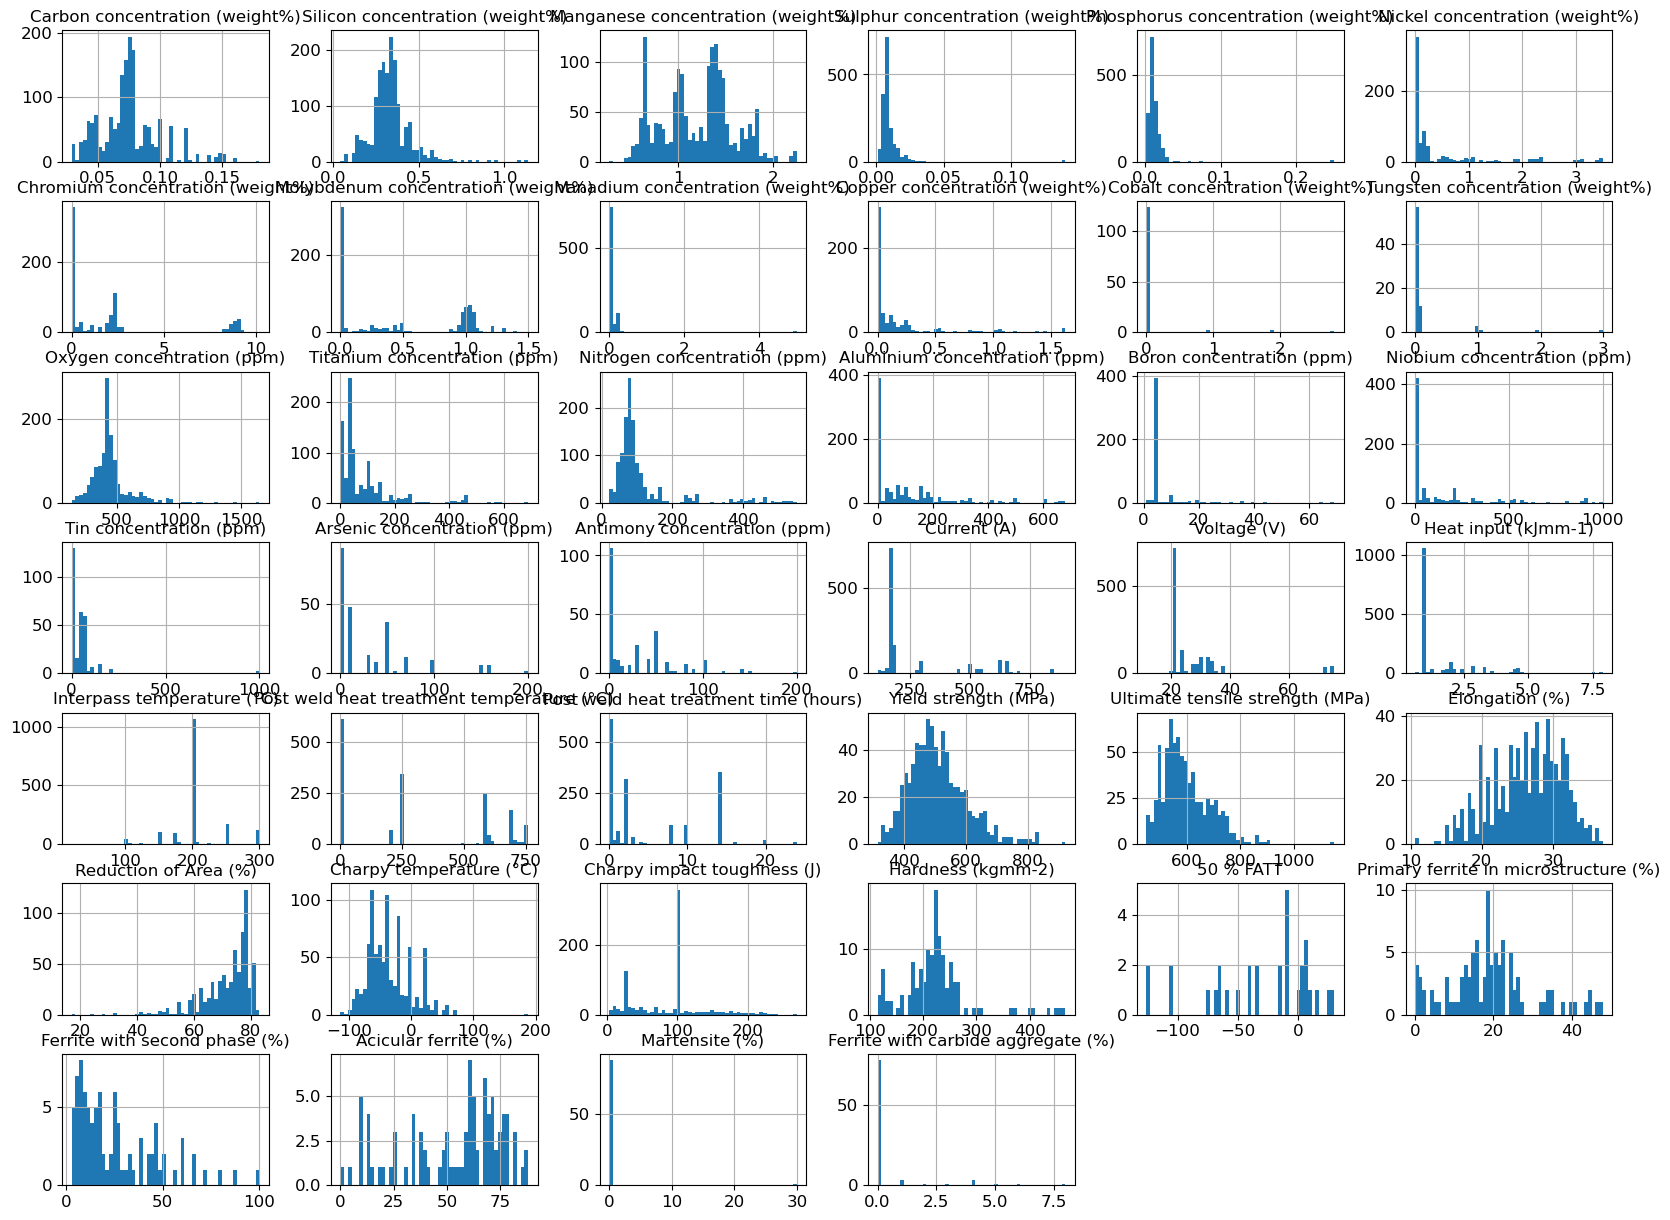

In [22]:
welddb.hist(bins=50, figsize=(20, 15))
plt.show()

# Missing Values

1. **Phosphorus (P) and Sulphur (S) Concentrations**:

   For **Phosphorus (P)** and **Sulphur (S)**, replace the missing values with the **mean values** calculated from the entire dataset (1652 entries).

2. **Other Elements (Mn, Ni, etc.)**:

   For other elements like **Manganese (Mn)**, **Nickel (Ni)**, etc., replace the missing values with **0**, as their absence suggests concentrations close to zero, which is consistent with the idea that they were not deliberately added.

In [23]:
# Replace missing values for Phosphorus (P) and Sulphur (S) with their mean values
welddb['Sulphur concentration (weight%)'].fillna(welddb['Sulphur concentration (weight%)'].mean(), inplace=True)
welddb['Phosphorus concentration (weight%)'].fillna(welddb['Phosphorus concentration (weight%)'].mean(), inplace=True)

# Replace missing values for all other elements with 0 (as they were not deliberately added)
elements_to_zero = [
    'Manganese concentration (weight%)', 'Nickel concentration (weight%)',
    'Chromium concentration (weight%)', 'Molybdenum concentration (weight%)',
    'Vanadium concentration (weight%)', 'Copper concentration (weight%)',
    'Cobalt concentration (weight%)', 'Tungsten concentration (weight%)',
    'Oxygen concentration (ppm)', 'Titanium concentration (ppm)', 
    'Nitrogen concentration (ppm)', 'Aluminium concentration (ppm)', 
    'Boron concentration (ppm)', 'Niobium concentration (ppm)',
    'Tin concentration (ppm)', 'Arsenic concentration (ppm)', 
    'Antimony concentration (ppm)'
]

# Replace missing values with 0 for the other elements
welddb[elements_to_zero] = welddb[elements_to_zero].fillna(0)


C:\Users\12264\AppData\Local\Temp\ipykernel_22372\1098109312.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  welddb['Sulphur concentration (weight%)'].fillna(welddb['Sulphur concentration (weight%)'].mean(), inplace=True)
C:\Users\12264\AppData\Local\Temp\ipykernel_22372\1098109312.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object o

In [24]:
welddb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1652 entries, 0 to 1651
Data columns (total 43 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Carbon concentration (weight%)             1652 non-null   float64
 1   Silicon concentration (weight%)            1652 non-null   float64
 2   Manganese concentration (weight%)          1652 non-null   float64
 3   Sulphur concentration (weight%)            1652 non-null   float64
 4   Phosphorus concentration (weight%)         1652 non-null   float64
 5   Nickel concentration (weight%)             1652 non-null   float64
 6   Chromium concentration (weight%)           1652 non-null   float64
 7   Molybdenum concentration (weight%)         1652 non-null   float64
 8   Vanadium concentration (weight%)           1652 non-null   float64
 9   Copper concentration (weight%)             1652 non-null   float64
 10  Cobalt concentration (we

# Calculate Power (W)

In [25]:
welddb['Current (A)'].unique()

array([170. , 180. , 165. , 280. , 285. , 680. , 665. , 670. , 640. ,
       660. , 700. ,   nan, 625. , 550. , 850. , 650. , 450. , 181. ,
       201. , 116. , 115. , 163. , 145. , 143. , 146. , 400. , 390. ,
       300. , 275. , 500. , 535. , 290. , 277.5, 150. , 525. , 545. ,
       900. , 190. ])

In [26]:
welddb['Voltage (V)'].unique()

array([21.  , 34.  , 24.  , 25.  , 23.  , 30.  , 32.  ,   nan, 75.36,
       72.24, 28.  , 35.  , 33.  , 38.  , 22.  , 20.  , 31.5 , 11.5 ,
       12.5 , 28.5 , 29.  , 63.  , 26.  , 27.  , 37.5 ])

In [29]:
missing_current = welddb['Current (A)'].isnull()
missing_voltage = welddb['Voltage (V)'].isnull()

# Identify cases where only one of the two features is missing
only_one_missing = (missing_current & ~missing_voltage) | (~missing_current & missing_voltage)

print(welddb[only_one_missing].shape[0])

0


In [30]:
welddb['Power (W)'] = welddb['Current (A)'] * welddb['Voltage (V)']

In [31]:
welddb.shape

(1652, 44)

In [32]:
welddb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1652 entries, 0 to 1651
Data columns (total 44 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Carbon concentration (weight%)             1652 non-null   float64
 1   Silicon concentration (weight%)            1652 non-null   float64
 2   Manganese concentration (weight%)          1652 non-null   float64
 3   Sulphur concentration (weight%)            1652 non-null   float64
 4   Phosphorus concentration (weight%)         1652 non-null   float64
 5   Nickel concentration (weight%)             1652 non-null   float64
 6   Chromium concentration (weight%)           1652 non-null   float64
 7   Molybdenum concentration (weight%)         1652 non-null   float64
 8   Vanadium concentration (weight%)           1652 non-null   float64
 9   Copper concentration (weight%)             1652 non-null   float64
 10  Cobalt concentration (we

# Yield Strength Prediction
## Select features and instances

In [21]:
# Select the relevant columns for concentrations, weld process parameters, and yield strength
columns_to_keep = [
    'Carbon concentration (weight%)', 'Silicon concentration (weight%)', 
    'Manganese concentration (weight%)', 'Sulphur concentration (weight%)', 
    'Phosphorus concentration (weight%)', 'Nickel concentration (weight%)', 
    'Chromium concentration (weight%)', 'Molybdenum concentration (weight%)', 
    'Vanadium concentration (weight%)', 'Copper concentration (weight%)', 
    'Cobalt concentration (weight%)', 'Tungsten concentration (weight%)', 
    'Oxygen concentration (ppm)', 'Titanium concentration (ppm)', 
    'Nitrogen concentration (ppm)', 'Aluminium concentration (ppm)', 
    'Boron concentration (ppm)', 'Niobium concentration (ppm)', 
    'Tin concentration (ppm)', 'Arsenic concentration (ppm)', 
    'Antimony concentration (ppm)', 
    'Current (A)', 'Voltage (V)', 'AC or DC', 'Electrode positive or negative', 
    'Heat input (kJmm-1)', 'Interpass temperature (°C)', 'Type of weld', 
    'Post weld heat treatment temperature (°C)', 'Post weld heat treatment time (hours)', 
    'Yield strength (MPa)'
]

# Create a new DataFrame and call it welddb_yield
welddb_yield = welddb[columns_to_keep]


In [22]:
welddb_yield = welddb_yield[welddb_yield['Yield strength (MPa)'].notnull()]

In [23]:
welddb_yield.info()

<class 'pandas.core.frame.DataFrame'>
Index: 780 entries, 0 to 1650
Data columns (total 31 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Carbon concentration (weight%)             780 non-null    float64
 1   Silicon concentration (weight%)            780 non-null    float64
 2   Manganese concentration (weight%)          780 non-null    float64
 3   Sulphur concentration (weight%)            780 non-null    float64
 4   Phosphorus concentration (weight%)         780 non-null    float64
 5   Nickel concentration (weight%)             780 non-null    float64
 6   Chromium concentration (weight%)           780 non-null    float64
 7   Molybdenum concentration (weight%)         780 non-null    float64
 8   Vanadium concentration (weight%)           780 non-null    float64
 9   Copper concentration (weight%)             780 non-null    float64
 10  Cobalt concentration (weight%)

In [24]:
welddb_yield_clean = welddb_yield.dropna()

In [25]:
welddb_yield_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 591 entries, 0 to 1436
Data columns (total 31 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Carbon concentration (weight%)             591 non-null    float64
 1   Silicon concentration (weight%)            591 non-null    float64
 2   Manganese concentration (weight%)          591 non-null    float64
 3   Sulphur concentration (weight%)            591 non-null    float64
 4   Phosphorus concentration (weight%)         591 non-null    float64
 5   Nickel concentration (weight%)             591 non-null    float64
 6   Chromium concentration (weight%)           591 non-null    float64
 7   Molybdenum concentration (weight%)         591 non-null    float64
 8   Vanadium concentration (weight%)           591 non-null    float64
 9   Copper concentration (weight%)             591 non-null    float64
 10  Cobalt concentration (weight%)

In [26]:
welddb_yield_clean['Electrode positive or negative'].value_counts()

Electrode positive or negative
+    576
0      8
-      7
Name: count, dtype: int64

## Correlation analysis

In [27]:
numeric_welddb = welddb_yield_clean.select_dtypes(include=[float, int])
corr_matrix = numeric_welddb.corr()

In [28]:
corr_matrix["Yield strength (MPa)"].sort_values(ascending=False)

Yield strength (MPa)                         1.000000
Molybdenum concentration (weight%)           0.392834
Vanadium concentration (weight%)             0.354401
Chromium concentration (weight%)             0.323613
Nickel concentration (weight%)               0.264174
Niobium concentration (ppm)                  0.241869
Nitrogen concentration (ppm)                 0.220553
Manganese concentration (weight%)            0.204469
Phosphorus concentration (weight%)           0.197780
Carbon concentration (weight%)               0.168526
Copper concentration (weight%)               0.138268
Current (A)                                  0.099548
Boron concentration (ppm)                    0.092786
Sulphur concentration (weight%)              0.092476
Post weld heat treatment temperature (°C)    0.084033
Heat input (kJmm-1)                          0.053296
Voltage (V)                                  0.050965
Post weld heat treatment time (hours)        0.030835
Silicon concentration (weigh

In [29]:
welddb_yield_clean.shape


(591, 31)

## Categorical features

In [30]:
# Get dummy variables for the categorical features
dummies = pd.get_dummies(welddb_yield_clean[['AC or DC', 'Electrode positive or negative', 'Type of weld']], drop_first=True)

# Extract the target variable
y = welddb_yield_clean['Yield strength (MPa)']

# Drop the original categorical columns
X_ = welddb_yield_clean.drop(['AC or DC', 'Electrode positive or negative', 'Type of weld', 'Yield strength (MPa)'], axis=1).astype('float64')

# Concatenate the dummy variables with the rest of the numerical data
X = pd.concat([X_, dummies], axis=1)

X.shape

(591, 37)

In [31]:
y.shape

(591,)

In [32]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 591 entries, 0 to 1436
Data columns (total 37 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Carbon concentration (weight%)             591 non-null    float64
 1   Silicon concentration (weight%)            591 non-null    float64
 2   Manganese concentration (weight%)          591 non-null    float64
 3   Sulphur concentration (weight%)            591 non-null    float64
 4   Phosphorus concentration (weight%)         591 non-null    float64
 5   Nickel concentration (weight%)             591 non-null    float64
 6   Chromium concentration (weight%)           591 non-null    float64
 7   Molybdenum concentration (weight%)         591 non-null    float64
 8   Vanadium concentration (weight%)           591 non-null    float64
 9   Copper concentration (weight%)             591 non-null    float64
 10  Cobalt concentration (weight%)

## Forward and Backward Stepwise Selection

In [33]:
bool_columns = [
    'AC or DC_DC', 
    'Electrode positive or negative_-', 
    'Electrode positive or negative_0', 
    'Type of weld_GMAA', 
    'Type of weld_GTAA', 
    'Type of weld_MMA', 
    'Type of weld_SA', 
    'Type of weld_SAA', 
    'Type of weld_ShMA', 
    'Type of weld_TSA'
]

# Convert the boolean columns to integers
X[bool_columns] = X[bool_columns].astype(int)

In [34]:
def processSubset(feature_set):
    # Fit OLS (Ordinary Least Squares) model on feature_set and calculate RSS
    model = sm.OLS(y,X[list(feature_set)])
    regr = model.fit()
    RSS = ((regr.predict(X[list(feature_set)]) - y) ** 2).sum()
    return {"model":regr, "RSS":RSS}

In [35]:
def forward(features):

    # Pull out features we still need to process
    remaining_features = [d for d in X.columns if d not in features]
    
    tic = time.time()
    
    results = []
    
    for d in remaining_features:
        results.append(processSubset(features+[d]))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the highest RSS
    best_model = models.loc[models['RSS'].argmin()]
    
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(features)+1, "features in", (toc-tic), "seconds.")
    
    # Return the best model, along with some other useful information about the model
    return best_model

In [36]:
models_fwd = pd.DataFrame(columns=["RSS", "model"])

tic = time.time()
features = []

for i in range(1,len(X.columns)+1):    
    models_fwd.loc[i] = forward(features)
    features = models_fwd.loc[i]["model"].model.exog_names

toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")


Processed  37 models on 1 features in 0.030197858810424805 seconds.
Processed  36 models on 2 features in 0.02229762077331543 seconds.
Processed  35 models on 3 features in 0.0349118709564209 seconds.
Processed  34 models on 4 features in 0.04844856262207031 seconds.
Processed  33 models on 5 features in 0.045304298400878906 seconds.
Processed  32 models on 6 features in 0.06261110305786133 seconds.
Processed  31 models on 7 features in 0.04763936996459961 seconds.
Processed  30 models on 8 features in 0.05338788032531738 seconds.
Processed  29 models on 9 features in 0.020775318145751953 seconds.
Processed  28 models on 10 features in 0.03999948501586914 seconds.
Processed  27 models on 11 features in 0.031279802322387695 seconds.
Processed  26 models on 12 features in 0.0312504768371582 seconds.
Processed  25 models on 13 features in 0.03532838821411133 seconds.
Processed  24 models on 14 features in 0.03672313690185547 seconds.
Processed  23 models on 15 features in 0.02464389801025

In [37]:
print(models_fwd.loc[1, "model"].summary())
print(models_fwd.loc[5, "model"].summary())

                                  OLS Regression Results                                 
Dep. Variable:     Yield strength (MPa)   R-squared (uncentered):                   0.947
Model:                              OLS   Adj. R-squared (uncentered):              0.947
Method:                   Least Squares   F-statistic:                          1.057e+04
Date:                  Tue, 08 Oct 2024   Prob (F-statistic):                        0.00
Time:                          12:22:49   Log-Likelihood:                         -3661.0
No. Observations:                   591   AIC:                                      7324.
Df Residuals:                       590   BIC:                                      7328.
Df Model:                             1                                                  
Covariance Type:              nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------

In [38]:
def backward(features):
    
    tic = time.time()
    
    results = []
    
    for combo in itertools.combinations(features, len(features)-1):
        results.append(processSubset(combo))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the highest RSS
    best_model = models.loc[models['RSS'].argmin()]
    
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(features)-1, "features in", (toc-tic), "seconds.")
    
    # Return the best model, along with some other useful information about the model
    return best_model

In [39]:
models_bwd = pd.DataFrame(columns=["RSS", "model"], index = range(1,len(X.columns)))

tic = time.time()
features = X.columns

while(len(features) > 1):  
    models_bwd.loc[len(features)-1] = backward(features)
    features = models_bwd.loc[len(features)-1]["model"].model.exog_names

toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")


Processed  37 models on 36 features in 0.10579609870910645 seconds.
Processed  36 models on 35 features in 0.0954122543334961 seconds.
Processed  35 models on 34 features in 0.12457871437072754 seconds.
Processed  34 models on 33 features in 0.11828470230102539 seconds.
Processed  33 models on 32 features in 0.11717391014099121 seconds.
Processed  32 models on 31 features in 0.11825156211853027 seconds.
Processed  31 models on 30 features in 0.13171625137329102 seconds.
Processed  30 models on 29 features in 0.09026265144348145 seconds.
Processed  29 models on 28 features in 0.07619333267211914 seconds.
Processed  28 models on 27 features in 0.06276845932006836 seconds.
Processed  27 models on 26 features in 0.062468767166137695 seconds.
Processed  26 models on 25 features in 0.05545449256896973 seconds.
Processed  25 models on 24 features in 0.05551338195800781 seconds.
Processed  24 models on 23 features in 0.04887747764587402 seconds.
Processed  23 models on 22 features in 0.0414514

In [40]:
print("-----------------")
print("Foward Selection:")
print("-----------------")
print(models_fwd.loc[8, "model"].params)

-----------------
Foward Selection:
-----------------
AC or DC_DC                           344.761638
Electrode positive or negative_0      401.025222
Type of weld_SAA                      448.167254
Molybdenum concentration (weight%)    116.598979
Manganese concentration (weight%)     100.523210
Nickel concentration (weight%)         42.006344
Niobium concentration (ppm)             0.115404
Type of weld_GTAA                     168.357098
dtype: float64


In [41]:
print("-------------------")
print("Backward Selection:")
print("-------------------")
print(models_bwd.loc[8, "model"].params)

-------------------
Backward Selection:
-------------------
Manganese concentration (weight%)      95.688454
Nickel concentration (weight%)         42.065748
Molybdenum concentration (weight%)    105.874622
Vanadium concentration (weight%)      268.872194
Niobium concentration (ppm)             0.086029
AC or DC_DC                           350.409904
Electrode positive or negative_0      409.807755
Type of weld_SAA                      408.170871
dtype: float64


## Model selection using Cross-Validation approach

In [42]:
# Number of folds
K = 10
np.random.seed(seed=1)
folds = np.random.choice(K, size = len(y), replace = True)

# Create a DataFrame to store the results of our upcoming calculations
cv_errors = pd.DataFrame(columns=range(1,K+1), index=range(1, 38)) # Here we have 37 features
cv_errors = cv_errors.fillna(0)


C:\Users\12264\AppData\Local\Temp\ipykernel_3076\191552433.py:8: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cv_errors = cv_errors.fillna(0)


In [43]:
def processSubset(feature_set, X_train, y_train, X_test, y_test):
    # Fit OLS model on feature_set (from train)
    model = sm.OLS(y_train,X_train[list(feature_set)])
    regr = model.fit()
    # Compute RSS using model predictions on feature_set (from test) and the true test value of the target
    RSS = ((regr.predict(X_test[list(feature_set)]) - y_test) ** 2).sum()
    return {"model":regr, "RSS":RSS}

In [44]:
def forwardCV(features, X_train, y_train, X_test, y_test):
    
    results = []

    # Pull out features we still need to process
    remaining_features = [d for d in X_train.columns if d not in features]
    
    for d in remaining_features:
        results.append(processSubset(features+[d], X_train, y_train, X_test, y_test))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the highest RSS
    best_model = models.loc[models['RSS'].argmin()]
        
    # Return the best model, along with some other useful information about the model
    return best_model

In [45]:
models_cv = pd.DataFrame(columns=["RSS", "model"])
    
# Outer loop iterates over all folds
for k in range(1,K+1):

    # Reset features
    features = []
    
    # Inner loop iterates over each size i
    for i in range(1,len(X.columns)+1):    
    
        # The perform forward selection on the full dataset minus the kth fold, test on kth fold
        models_cv.loc[i] = forwardCV(features, X[folds != (k-1)], y[folds != (k-1)], X[folds == (k-1)], y[folds == (k-1)])
        
        # Save the cross-validated error for this fold
        cv_errors[k][i] = models_cv.loc[i]["RSS"]

        # Extract the features
        features = models_cv.loc[i]["model"].model.exog_names

C:\Users\12264\AppData\Local\Temp\ipykernel_3076\2821009788.py:16: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  cv_errors[k][i] = models_cv.loc[i]["RSS"]
C:\Users\12264\AppData\Local\Temp\ipykernel_3076\2821009788.py:16: FutureWarning: Sett

In [46]:
cv_errors

,1,2,3,4,5,6,7,8,9,10
1,742399.314554,923636.025009,1.264975e+06,312413.274808,870989.550343,658431.340767,639872.532150,1.001696e+06,742091.555269,809019.096087
2,552072.969840,533111.025009,8.430193e+05,258933.164882,585031.232708,298176.340767,549646.084825,4.256421e+05,580205.011574,417218.207198
3,442185.069920,345247.351540,4.947399e+05,206324.350119,401741.771228,243480.191830,475694.527258,3.712856e+05,467195.378793,302618.679978
4,388528.918275,300837.921443,4.221939e+05,190117.757392,350189.358063,220363.959682,442172.586955,3.023154e+05,375422.418353,280146.812371
5,366203.436362,265630.308002,3.749245e+05,173443.068260,309955.677385,202287.211166,413482.619181,2.631915e+05,322659.609545,260212.166804
6,343756.126318,247999.436557,3.391911e+05,169146.247653,276898.090062,187671.443860,397282.904791,2.529586e+05,300674.672330,216147.756416
7,328302.612177,239430.608009,3.214825e+05,147915.207013,256584.066440,182257.299913,374483.800042,2.455249e+05,280039.247339,194462.129693
8,314213.062262,226245.228668,3.149744e+05,138761.242351,235800.989068,179343.549555,350981.265004,2.411617e+05,267134.786842,181646.332999
9,302039.845093,217772.045909,3.107206e+05,131988.833333,220203.178828,176697.171226,338799.384144,2.371788e+05,256070.162019,175196.335407
10,294393.059315,211717.566090,3.065031e+05,126270.371975,207703.953557,175219.767751,333666.422276,2.343428e+05,248074.252731,167763.235698


This has filled up the `cv_errors` DataFrame such that the $(i,k)^{th}$ element corresponds to the test `MSE` for the $k^{th}$ cross-validation fold for the best $i$-feature model. We can then use the apply() function to take the mean over the columns of this matrix. This will give us a vector for which the $i^{th}$ element is the cross-validation error for the $i$-variable model.

1     796552.317577
2     504305.546803
3     375051.279871
4     327228.899891
5     295199.009143
6     273172.640247
7     257048.238691
8     245026.261583
9     236666.635921
10    230565.456425
11    223511.073029
12    215348.195013
13    210269.606808
14    205750.901181
15    200850.708730
16    197120.451128
17    195015.663218
18    193373.638042
19    191971.971594
20    190418.453342
21    189382.055572
22    189038.788413
23    189890.566864
24    190132.782351
25    188365.062907
26    188323.462214
27    189384.475496
28    190839.224651
29    191999.996354
30    193469.275889
31    196618.534535
32    199519.768807
33    205151.189020
34    209322.939194
35    213295.070239
36    215795.229669
37    432065.316879
dtype: float64


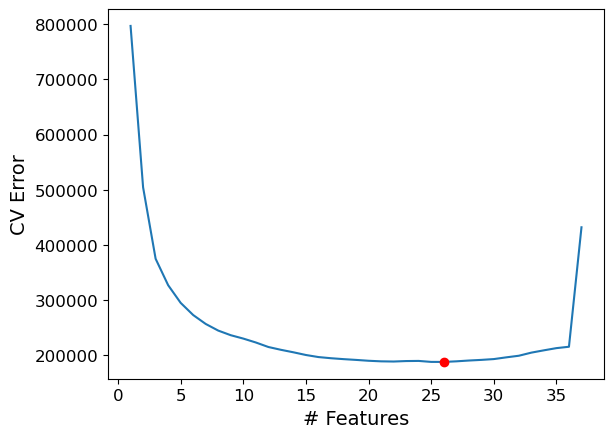

In [47]:
cv_mean = cv_errors.apply(np.mean, axis=1)
print(cv_mean)

plt.plot(cv_mean)
plt.xlabel('# Features')
plt.ylabel('CV Error')
plt.plot(cv_mean.argmin()+1, cv_mean.min(), "or")

In [66]:
print(models_cv.loc[10, "model"].summary())

                                  OLS Regression Results                                 
Dep. Variable:     Yield strength (MPa)   R-squared (uncentered):                   0.978
Model:                              OLS   Adj. R-squared (uncentered):              0.977
Method:                   Least Squares   F-statistic:                              2308.
Date:                  Tue, 08 Oct 2024   Prob (F-statistic):                        0.00
Time:                          13:40:35   Log-Likelihood:                         -3089.0
No. Observations:                   536   AIC:                                      6198.
Df Residuals:                       526   BIC:                                      6241.
Df Model:                            10                                                  
Covariance Type:              nonrobust                                                  
                                            coef    std err          t      P>|t|      [0.025      0

##  Principal Components Analysis (PCA)

In [49]:
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression, PLSSVD
from sklearn.metrics import mean_squared_error

# Some libraries for PCA visualization
import seaborn as sns 
#Make Plotly figure
import chart_studio.plotly as py
# Be aware, plotly may be installed using pip on your shell:
# conda install -c plotly chart-studio
import plotly.graph_objs as go

In [50]:
pca = PCA()
X_reduced = pca.fit_transform(scale(X))
X_reduced.shape

(591, 37)

In [51]:
pd.DataFrame(pca.components_.T).loc[:4,:5]

,0,1,2,3,4,5
0,0.249994,0.063856,-0.029044,-0.047252,-0.006758,-0.319098
1,-0.079967,-0.189222,0.062431,-0.159842,-0.150384,-0.154518
2,0.022535,-0.190080,0.028660,-0.059294,0.017142,-0.254158
3,0.192171,-0.016469,-0.134606,0.021844,0.452920,0.042426
4,0.149444,0.024024,-0.067669,0.031856,0.417057,0.122367


C:\Users\12264\AppData\Local\Temp\ipykernel_3076\989785756.py:10: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  score = -1*model_selection.cross_val_score(regr, np.ones((n,1)), y.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()
C:\Users\12264\AppData\Local\Temp\ipykernel_3076\989785756.py:15: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  score = -1*model_selection.cross_val_score(regr, X_reduced[:,:i], y.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()
C:\Users\12264\AppData\Local\Temp\ipykernel_3076\989785756.py:15: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  score = -1*model_selection.cross_val_score(reg

[7785.589783324729, 7593.9619667754905, 7156.653263011991, 7178.878818554843, 7072.551992477069, 7055.693740512656, 6994.918951729049, 6880.783593942031, 6677.141993381573, 6706.681986167081, 6734.606900191301, 6965.347358759398, 7002.877699402607, 7094.005859147798, 7182.634742224286, 8765.953591520269, 8961.551632008868, 9033.01954557541, 6668.138381332678, 6658.196825705515, 6892.963100580537, 6155.526588548954, 6062.405862728081, 5300.161656409407, 5088.275872721557, 4884.695387981711, 4917.041870862308, 4788.332804304542, 4654.1287302771325, 4383.769093452955, 4431.11950972576, 4460.14428164155, 4619.4947006295315, 4627.60240807609, 4641.930182631724, 4523.760191858851, 4682.523775072283, 4682.523775072279]


C:\Users\12264\AppData\Local\Temp\ipykernel_3076\989785756.py:15: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  score = -1*model_selection.cross_val_score(regr, X_reduced[:,:i], y.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()


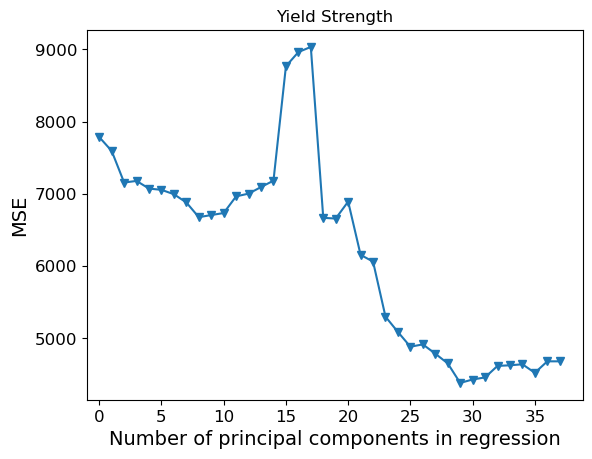

In [52]:
# 10-fold CV, with shuffle
n = len(X_reduced)

kf_10 = model_selection.KFold( n_splits=10, shuffle=True, random_state=1)

regr = LinearRegression()
mse = []

# Calculate MSE with only the intercept (no principal components in regression)
score = -1*model_selection.cross_val_score(regr, np.ones((n,1)), y.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()    
mse.append(score)

# Calculate MSE using CV for the 19 principal components, adding one component at the time.
for i in np.arange(1, 38):
    score = -1*model_selection.cross_val_score(regr, X_reduced[:,:i], y.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(score)
    
# Plot results    
plt.plot(mse, '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('Yield Strength')
plt.xlim(xmin=-1)

print(mse)

In [53]:
print(np.cumsum(np.round(pca.explained_variance_ratio_, decimals=6)*100))

[ 15.2367  28.1314  36.2252  42.5382  48.1461  53.3545  57.9698  61.6989
  65.0616  68.1992  71.2499  74.2     76.9492  79.6772  82.0593  84.3361
  86.2602  88.1001  89.7862  91.2887  92.6614  93.8616  94.9967  96.0418
  97.0118  97.7516  98.3331  98.738   99.094   99.3605  99.6103  99.7701
  99.8758  99.9535  99.99   100.     100.    ]


C:\Users\12264\AppData\Local\Temp\ipykernel_3076\697797388.py:19: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  score = -1*model_selection.cross_val_score(regr, np.ones((n,1)), y_train.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()
C:\Users\12264\AppData\Local\Temp\ipykernel_3076\697797388.py:27: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  score = -1*model_selection.cross_val_score(regr, X_reduced_train[:,:i], y_train.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()
C:\Users\12264\AppData\Local\Temp\ipykernel_3076\697797388.py:27: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  score = -1*model_selection.c

[7688.285464883835, 7554.726811808949, 7039.86526054645, 7093.416338362018, 7028.867756293597, 6923.389488282321, 6885.220479029423, 6845.525248017688, 6783.000043827461, 6777.066620154427, 6756.8309822969695, 6744.510729287879, 6712.395621305308, 6721.690413358371, 6621.3855190075965, 7200.476978510496, 5042.661531351684, 4980.887390129315, 5010.931476771696, 4958.405376280117, 4800.965034373259, 4827.143112039857, 4790.602512855277, 4464.612446879275, 4385.190478613172, 4385.440828439842, 4465.62721883218, 4441.714943415793, 4472.937097761247, 4484.112639242786, 4323.416422800865, 4334.589482611145, 4265.520329053916, 4270.886813156236, 4340.800826285226, 4242.595356839899, 4213.703708005991, 4213.703708005991]


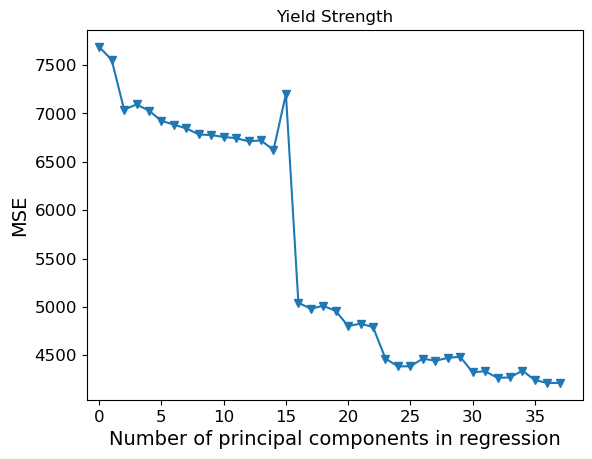

In [54]:
pca2 = PCA()

# Split into training and test sets
X_train, X_test , y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=1)

# Scale the data and fit the PCA 
# .fit_transform(X) fit the model with X and apply the dimensionality reduction on X
X_reduced_train = pca2.fit_transform(scale(X_train))
n = len(X_reduced_train)


# 10-fold CV, with shuffle
kf_10 = model_selection.KFold( n_splits=10, shuffle=True, random_state=1)

mse = []

# Compute MSE with only the intercept (no principal components in regression)
#and 10-fold CV is only applied on the train set
score = -1*model_selection.cross_val_score(regr, np.ones((n,1)), y_train.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()    
mse.append(score)
#print(mse)


# Compute MSE using CV for the 19 principal components, adding one component at the time
#10-fold CV is only applied on the train set
for i in np.arange(1, 38):
    score = -1*model_selection.cross_val_score(regr, X_reduced_train[:,:i], y_train.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(score)

plt.plot(mse, '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('Yield Strength')
plt.xlim(xmin=-1)

print(mse)

In [55]:
X_reduced_test = pca2.fit_transform(scale(X_test))[:,:16]

#print(X_reduced_test.shape)
#pd.DataFrame(X_reduced_test).info()

# If you want to compare before and after to apply the PCA:
#print(pd.DataFrame(X_reduced_test).describe())
#print(pd.DataFrame(scale(X_test)).describe())

# Train regression model on training data 
regr = LinearRegression()
regr.fit(X_reduced_train[:,:16], y_train)

# Prediction with test data
pred = regr.predict(X_reduced_test)
print('The final test MSE is: ',mean_squared_error(y_test, pred))


The final test MSE is:  9165.728969552674


## PCA visualization for $M=16$ components on welddb dataset

In [56]:
pcamodel = PCA(n_components=16)
pca = pcamodel.fit_transform(scale(X_test))
pca.shape

(119, 16)

In [57]:
pcamodel.explained_variance_ratio_

array([0.19107461, 0.15190562, 0.08809395, 0.07930568, 0.06507123,
       0.05911184, 0.04832774, 0.03938068, 0.03457152, 0.03295175,
       0.02619224, 0.02530768, 0.02342827, 0.02216106, 0.01918707,
       0.01501425])

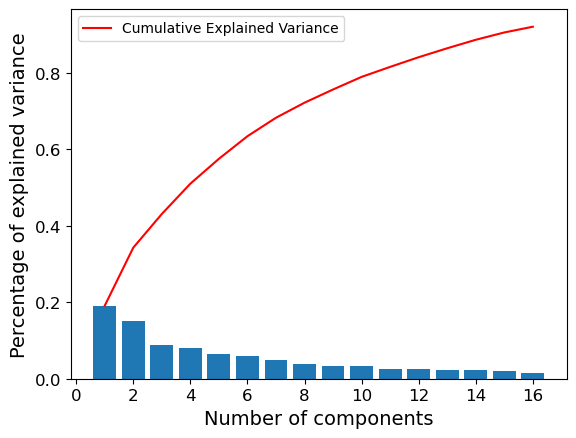

In [58]:
# Explained variance plot
plt.bar(range(1,len(pcamodel.explained_variance_ratio_ )+1),pcamodel.explained_variance_ratio_ )
plt.ylabel('Percentage of explained variance')
plt.xlabel('Number of components')
plt.plot(range(1,len(pcamodel.explained_variance_ratio_ )+1),
         np.cumsum(pcamodel.explained_variance_ratio_ ),
         c='red',
         label="Cumulative Explained Variance")
plt.legend(loc='upper left')

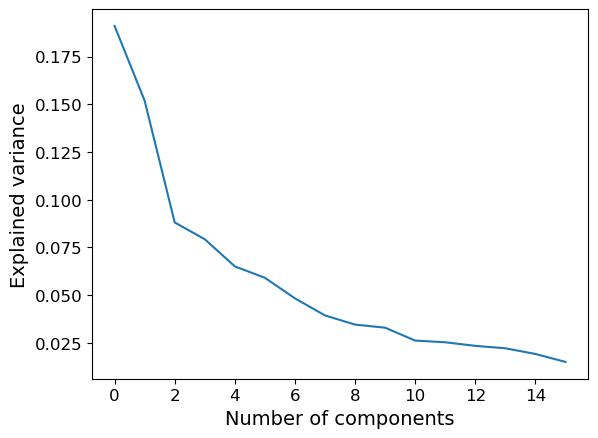

In [59]:
# Scree plot
plt.plot(pcamodel.explained_variance_ratio_)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.show()


Text(0.5, 0, 'PCA 1')

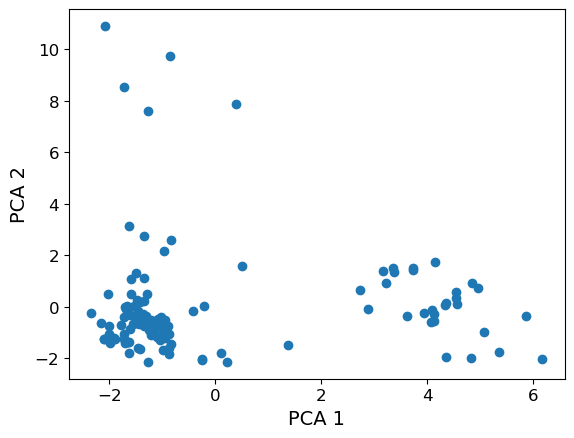

In [60]:
# Scatter plot of PCA1 and PCA2
plt.scatter(pca[:, 0], pca[:, 1])
plt.ylabel('PCA 2')
plt.xlabel('PCA 1')


In [61]:
# 3D Scatter plot of PCA1,PCA2 and PCA3
import chart_studio
import plotly.graph_objects as go

# Create your api key here: https://chart-studio.plotly.com/settings/api#/
chart_studio.tools.set_credentials_file(username='yxzuo', api_key='p7N7e79kdaI05IJ5R8VS')

fig1 = go.Scatter3d(x=pca[:, 0],
                    y=pca[:, 1],
                    z=pca[:, 2],
                    marker=dict(opacity=0.9,
                                reversescale=True,
                                colorscale='Blues',
                                size=5),
                    line=dict (width=0.02),
                    mode='markers')

#Make Plot.ly Layout
mylayout = go.Layout(scene=dict(xaxis=dict( title="PCA1"),
                                yaxis=dict( title="PCA2"),
                                zaxis=dict(title="PCA3")),)

#Plot and save html
py.iplot({"data": [fig1],
                     "layout": mylayout},
                     auto_open=True,
                     filename=("3DPlot.html"))

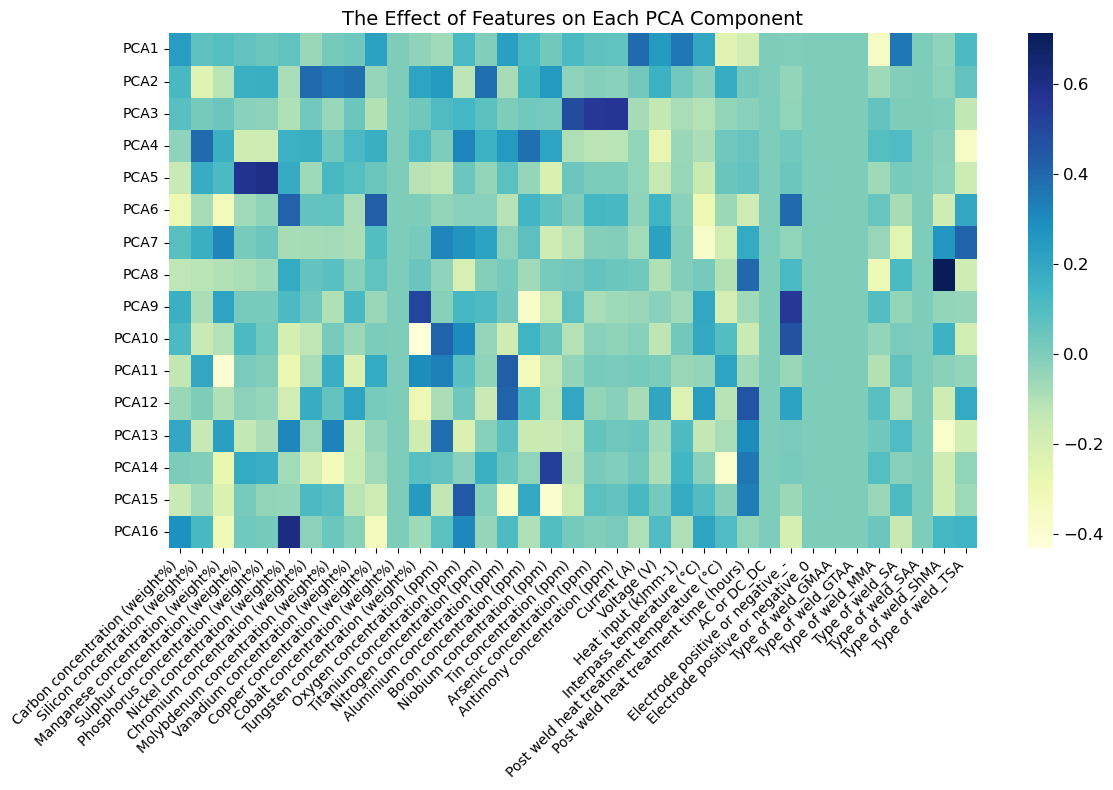

In [62]:
plt.figure(figsize=(12, 8))

ax = sns.heatmap(pcamodel.components_,
                 cmap='YlGnBu',
                 yticklabels=["PCA" + str(X_test) for X_test in range(1, pcamodel.n_components_ + 1)],
                 xticklabels=list(X_test.columns),
                 cbar_kws={"orientation": "vertical"})

plt.xticks(rotation=45, ha='right', fontsize=10) 
plt.yticks(rotation=0, fontsize=10)
ax.set_aspect("auto")
plt.title('The Effect of Features on Each PCA Component', fontsize=14)
plt.tight_layout()
plt.show()


In [63]:
# PCA Biplot
def PCA_biplot(score, coeff, labels=None, num_features=10):
    xs = score[:, 0]
    ys = score[:, 1]
    
    # Scaling factors to normalize the plot
    scalex = 1.0 / (xs.max() - xs.min())
    scaley = 1.0 / (ys.max() - ys.min())
    
    plt.figure(figsize=(10, 8))
    
    plt.scatter(xs * scalex, ys * scaley, s=5)
    
    # Only plot the most important features (up to `num_features`)
    n = min(coeff.shape[0], num_features)
    
    for i in range(n):
        plt.arrow(0, 0, coeff[i, 0], coeff[i, 1], color='r', alpha=0.5, head_width=0.02)
        if labels is None:
            plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, "Var" + str(i+1), color='green', ha='center', va='center')
        else:
            plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, labels[i], color='g', ha='center', va='center')
    
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.grid()
    plt.tight_layout()


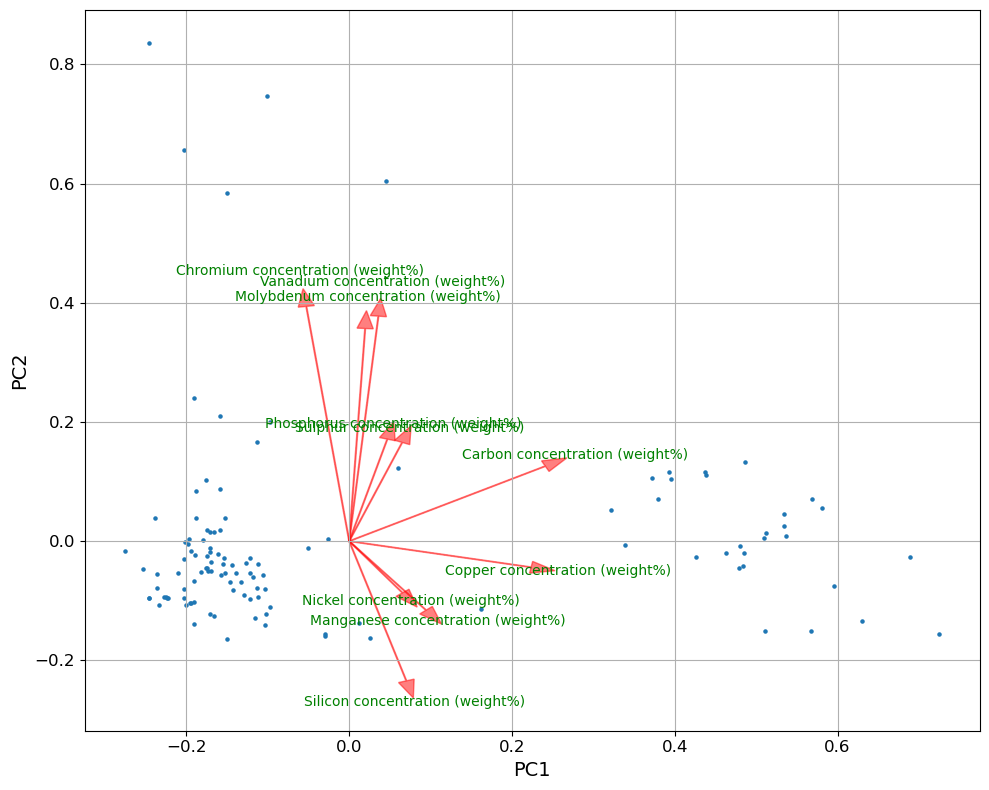

In [64]:
# # PCA Biplot (PC1 and PC2)
# Select only the top features to avoid clutter (e.g., top 10 most important features)
PCA_biplot(pca[:, 0:2], np.transpose(pcamodel.components_[0:2, :]), list(X_test.columns), num_features=10)

plt.show()

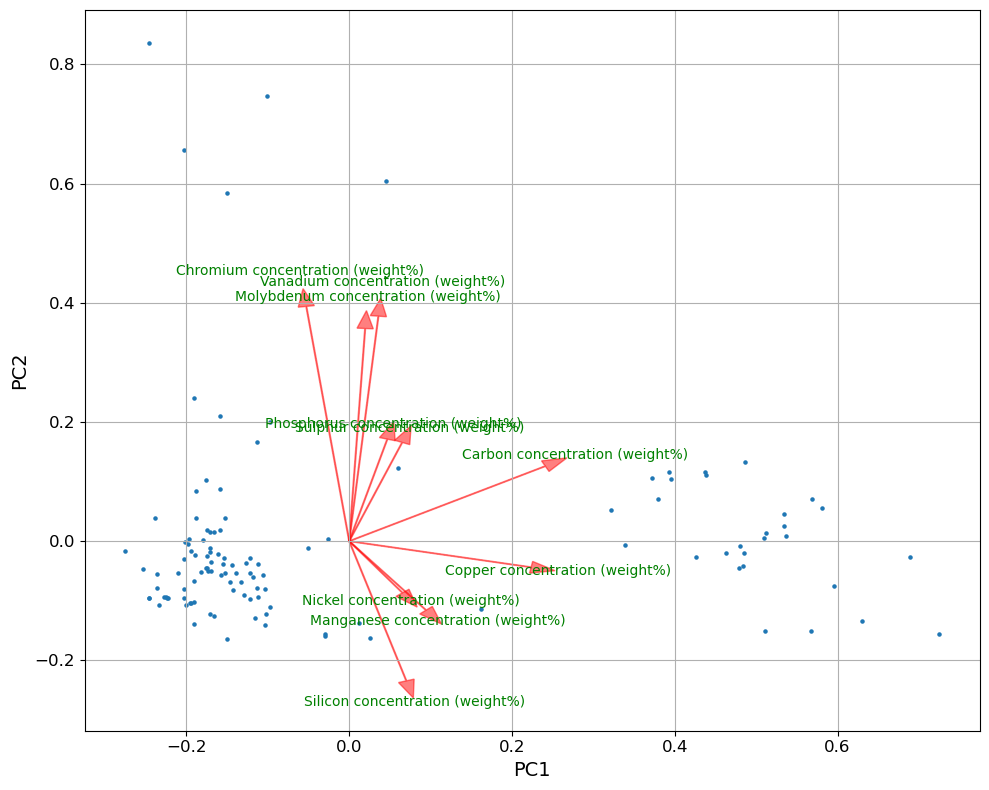

In [65]:
# PCA Biplot (PC1 and PC3)
PCA_biplot(pca[:, 0:3], np.transpose(pcamodel.components_[0:3, :]), list(X_test.columns), num_features=10)

plt.show()
